In [949]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [950]:
df=pd.read_csv("HDFC.csv",index_col='Date',parse_dates=True)

In [951]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327


# Data Preprocessing

In [952]:
df['Date']=df.index

In [953]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [954]:
df=df.loc[mask]

In [955]:
df=df.ffill()

In [956]:
df['Prev Close'].isnull().values.any()

False

In [957]:
df=df.drop(columns=['Date','Symbol','Series'])

In [958]:
df.dropna(inplace=True)

<AxesSubplot:>

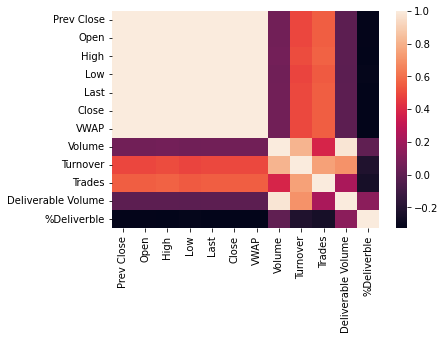

In [959]:
sn.heatmap(df.corr())

In [960]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2502, freq='B')

In [961]:
df=df.ffill(axis=0)
df['Prev Close'].isnull().values.any()

False

In [962]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest,3]
test=df.iloc[-Ntest:,3]

In [963]:
Decomp_results=seasonal_decompose(df['Prev Close'])

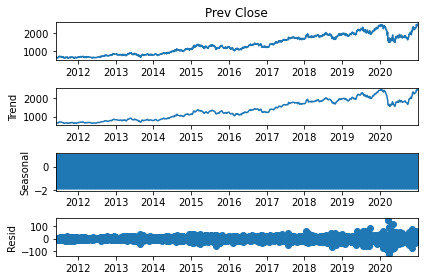

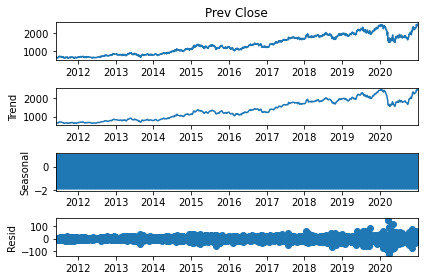

In [964]:
Decomp_results.plot()

In [965]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:-Ntest]
exo_test=exo.iloc[-Ntest:]


In [966]:
exo=exo.asfreq('B')
exo.ffill()
exo=np.nan_to_num(exo)

In [967]:
auto_arima(df['Prev Close'],exogenous=exo,m=1,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15402.817, Time=3.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14322.470, Time=2.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14838.896, Time=2.55 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15284.603, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2744.473, Time=2.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15381.686, Time=3.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15312.926, Time=3.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-15401.639, Time=3.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-15411.906, Time=4.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-15429.158, Time=3.70 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-15437.510, Time=3.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15418.317, Time=3.05 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-15471.626, Time=3.41 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-15452.196, Time=3.71 sec
 ARIMA(

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2502
Model:               SARIMAX(0, 1, 5)   Log Likelihood                7759.484
Date:                Sun, 25 Sep 2022   AIC                         -15484.967
Time:                        11:34:39   BIC                         -15385.952
Sample:                             0   HQIC                        -15449.020
                               - 2502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   4.97e-36   2.01e+35      0.000       1.000       1.000
x2         -2.082e-16   8.73e-35  -2.38e+18      0.000   -2.08e-16   -2.08e-16
x3          1.388e-16    5.2e-35   2.67e+18      0.000    1.39e-16    1.39e-16
x4         -6.939e-17   1.41e-34  -4.91e+17      0.000   -6.94e-17   -6.94e-17
x5           2.29e-16   6.39e-35   3.58e+18      0.000    2.29e-16    2.29e-16
x6          2.103e-16   6.09e-35   3.46e+18      0.000     2.1e-16     2.1e-16
x7         -1.318e-16   1.18e-34  -1.12e+18      0.000   -1.32e-16   -1.32e-16
x8          1.015e-17   4.96e-28   2.05e+10      0.000    1.02e-17    1.02e-17
x9          3.433e-17    3.3e-20   1039.056      0.000    3.43e-17    3.44e-17
x10        -8.933e-17   2.89e-31  -3.09e+14      0.000   -8.93e-17   -8.93e-17
x11         2.483e-17   4.63e-28   5.37e+10      0.000    2.48e-17    2.48e-17
ma.L1         -0.7374   4.05e-39  -1.82e+38      0.000      -0.737      -0.737
ma.L2         -0.0967   3.66e-39  -2.64e+37      0.000      -0.097      -0.097
ma.L3          0.0056   6.55e-39   8.49e+35      0.000       0.006       0.006
ma.L4         -0.0480    6.1e-39  -7.87e+36      0.000      -0.048      -0.048
ma.L5         -0.0252   8.69e-39  -2.89e+36      0.000      -0.025      -0.025
sigma2         0.0001   4.63e-33   2.64e+28      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   2.23   Jarque-Bera (JB):          22055718.50
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                           -15.29
Prob(H) (two-sided):                  0.00   Kurtosis:                       462.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.51e+53. Standard errors may be unstable.
"""

# ARIMAX

In [969]:
model_arimax=ARIMA(train,exog=exo_train,order=(0,1,5))

Model_arimax=model_arimax.fit()

Model_arimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Low   No. Observations:                 1751
Model:                 ARIMA(0, 1, 5)   Log Likelihood               -6534.730
Method:                       css-mle   S.D. of innovations             50.604
Date:                Sun, 25 Sep 2022   AIC                          13105.459
Time:                        11:35:24   BIC                          13203.882
Sample:                    06-02-2011   HQIC                         13141.842
                         - 02-15-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0058      0.865      0.007      0.995      -1.690       1.702
Prev Close            -0.9166      0.036    -25.484      0.000      -0.987      -0.846
Open                   0.0513      0.046      1.115      0.265      -0.039       0.141
High                   0.0010      0.054      0.019      0.985      -0.104       0.106
Low                    0.8749      0.082     10.669      0.000       0.714       1.036
Last                  -0.2692      0.084     -3.214      0.001      -0.433      -0.105
Close                  0.3884      0.118      3.294      0.001       0.157       0.619
VWAP                  -0.1230      0.083     -1.481      0.139      -0.286       0.040
Volume              1.172e-06   7.13e-08     16.428      0.000    1.03e-06    1.31e-06
Turnover            6.651e-16   1.26e-09   5.26e-07      1.000   -2.48e-09    2.48e-09
Trades              3.677e-05   1.05e-05      3.510      0.000    1.62e-05    5.73e-05
Deliverable Volume -1.417e-06        nan        nan        nan         nan         nan
ma.L1.D.Low           -0.0170      0.067     -0.252      0.801      -0.149       0.115
ma.L2.D.Low           -0.0139      0.026     -0.530      0.596      -0.065       0.038
ma.L3.D.Low           -0.0134      0.024     -0.566      0.571      -0.060       0.033
ma.L4.D.Low            0.0503      0.024      2.062      0.039       0.002       0.098
ma.L5.D.Low            0.0114      0.025      0.456      0.649      -0.038       0.060
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5108           -1.2555j            1.9643           -0.1104
MA.2            1.5108           +1.2555j            1.9643            0.1104
MA.3           -1.3241           -1.7321j            2.1802           -0.3539
MA.4           -1.3241           +1.7321j            2.1802            0.3539
MA.5           -4.7850           -0.0000j            4.7850           -0.5000
-----------------------------------------------------------------------------
"""

# SARIMAX

In [970]:
model_sarimax=SARIMAX(train,exog=exo_train,order=(5,1,3),seasonal_order=(0,0,0,0) )

Model_sarimax=model_sarimax.fit()

Model_sarimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                 1752
Model:               SARIMAX(5, 1, 3)   Log Likelihood                5600.110
Date:                Sun, 25 Sep 2022   AIC                         -11160.221
Time:                        11:35:28   BIC                         -11050.862
Sample:                    06-01-2011   HQIC                        -11119.796
                         - 02-15-2018                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close          1.415e-13   3.72e-36    3.8e+22      0.000    1.41e-13    1.41e-13
Open                3.497e-13   8.71e-35   4.02e+21      0.000     3.5e-13     3.5e-13
High                6.364e-13   6.96e-35   9.14e+21      0.000    6.36e-13    6.36e-13
Low                    1.0000   1.39e-34    7.2e+33      0.000       1.000       1.000
Last               -7.884e-13   8.08e-35  -9.75e+21      0.000   -7.88e-13   -7.88e-13
Close               1.918e-12   7.91e-35   2.42e+22      0.000    1.92e-12    1.92e-12
VWAP               -1.365e-12   1.28e-34  -1.07e+22      0.000   -1.36e-12   -1.36e-12
Volume             -5.895e-17   4.53e-28   -1.3e+11      0.000    -5.9e-17    -5.9e-17
Turnover           -3.144e-17   2.99e-20  -1050.601      0.000   -3.15e-17   -3.14e-17
Trades              5.979e-17   2.41e-31   2.48e+14      0.000    5.98e-17    5.98e-17
Deliverable Volume  2.599e-18   4.23e-28   6.15e+09      0.000     2.6e-18     2.6e-18
ar.L1                 -0.8096   1.42e-38  -5.69e+37      0.000      -0.810      -0.810
ar.L2                 -0.8274   1.04e-39  -7.92e+38      0.000      -0.827      -0.827
ar.L3                  0.0965   1.44e-38   6.71e+36      0.000       0.097       0.097
ar.L4                  0.0135   1.24e-38   1.09e+36      0.000       0.014       0.014
ar.L5                  0.0096   3.43e-39   2.81e+36      0.000       0.010       0.010
ma.L1                  0.0114   9.04e-39   1.26e+36      0.000       0.011       0.011
ma.L2                  0.1292   5.92e-39   2.18e+37      0.000       0.129       0.129
ma.L3                 -0.7880   6.06e-39   -1.3e+38      0.000      -0.788      -0.788
sigma2                 0.0001   4.66e-33   2.16e+28      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   2.19   Jarque-Bera (JB):          32838589.79
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                            21.43
Prob(H) (two-sided):                  0.00   Kurtosis:                       672.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.33e+55. Standard errors may be unstable.
"""

# Prediction

In [971]:
start_len=len(train)
end_len=len(train)+len(test)-1

In [972]:
pred_arimax=Model_arimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

In [973]:
pred_sarimax=Model_sarimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

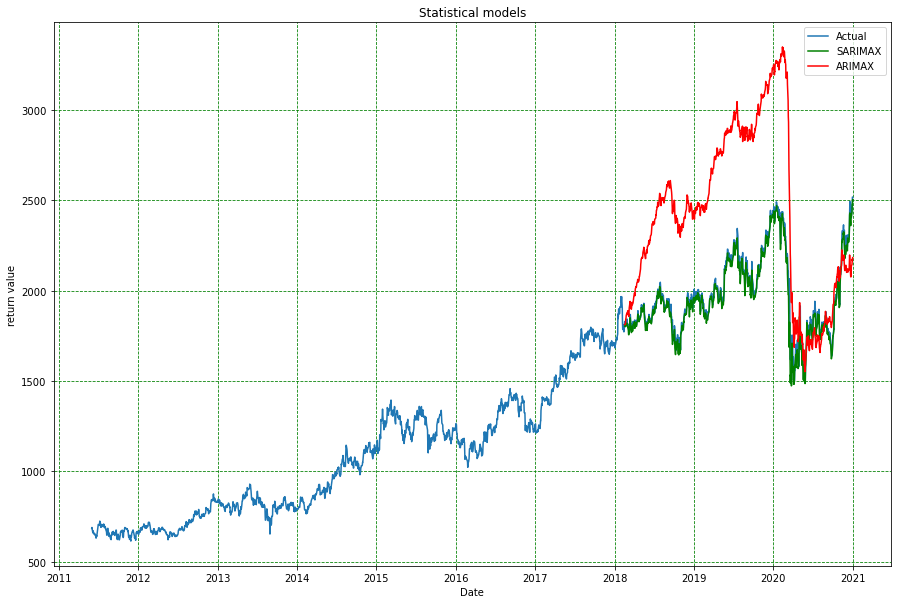

In [974]:
plt.figure(figsize=(15,10))
plt.plot(df['Prev Close'],label='Actual')
plt.plot(pred_sarimax,label='SARIMAX',color='green')
plt.plot(pred_arimax,label='ARIMAX',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [975]:
len(pred_arimax)
test=df['Prev Close'].iloc[-len(pred_arimax):]

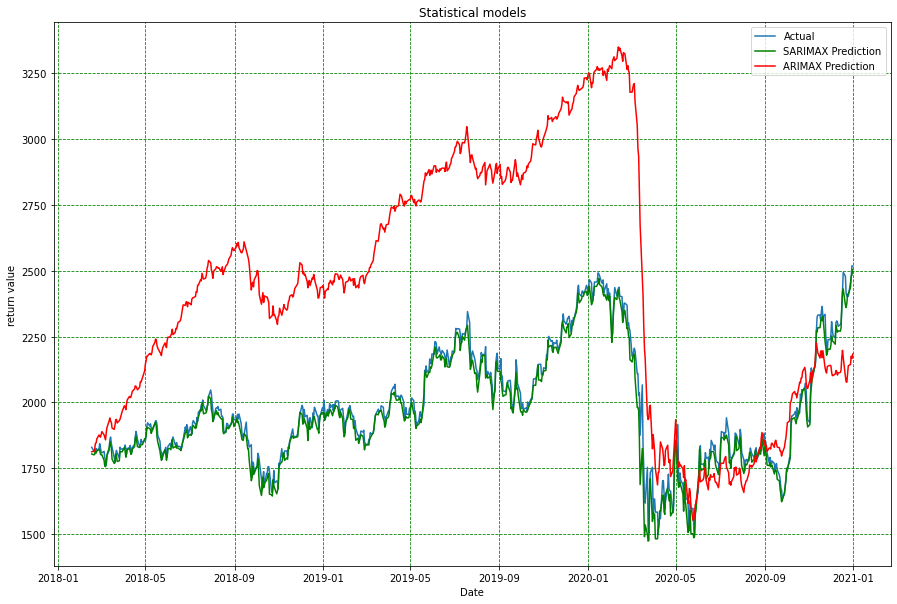

In [976]:
plt.figure(figsize=(15,10))
plt.plot(test,label='Actual')
plt.plot(pred_sarimax,label='SARIMAX Prediction',color='green')
plt.plot(pred_arimax,label='ARIMAX Prediction',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

# Evaluation

    ARIMAX

In [977]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_arimax))
print(rmse)

568.8582788613423


In [978]:
error=mean_absolute_error(test,pred_arimax)
print(error)

484.0170214579939


In [979]:
r2_score(test,pred_arimax)

-5.7050847475479305

    SARIMAX

In [980]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_sarimax))
print(rmse)

38.67628636527156


In [981]:
error=mean_absolute_error(test,pred_sarimax)
print(error)

25.97296602235917


In [982]:
r2_score(test,pred_sarimax)

0.969005428272742